In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api  as sm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import mean_squared_error

data = pd.read_csv('C:/Users/dines/OneDrive - JK LAKSHMIPAT UNIVERSITY/Desktop/AI & ML/ML/Lab_Assignment-3/creditcard.csv')
data = pd.DataFrame(data)

In [2]:
data.shape

(284807, 31)

In [3]:
data = data.drop('Time',axis=1)

In [4]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data.count()

V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [6]:
data.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
data.sample(frac=1,random_state=42)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
p = lambda x : x/100
p20 = p(20)

twn = int(len(data)*p20)
print(twn)

56961


In [9]:
test_data = data.tail(twn)
test_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227846,2.152696,-0.036161,-2.231811,0.091766,0.537612,-1.368103,0.613327,-0.455252,0.291814,0.253161,...,0.017153,0.063242,-0.034561,-0.626866,0.249213,0.773931,-0.137115,-0.090611,14.95,0
227847,-4.034795,2.305079,-1.461693,-0.729887,-1.528750,-1.225679,-0.893354,1.622522,1.291998,-0.040956,...,-0.392557,-0.787599,0.343468,-0.090331,0.248287,-0.238524,0.266484,-0.062236,7.70,0
227848,-1.668741,1.168055,0.249642,-1.268497,0.785923,-0.663959,0.859433,0.068111,-0.144183,0.043288,...,-0.247544,-0.592537,-0.286694,-0.378856,-0.077429,0.067608,-0.278962,-0.064193,6.99,0
227849,-0.550678,-0.429004,-1.291893,-0.414409,-0.292229,0.071843,2.426068,-0.212730,0.412374,-1.939969,...,0.003032,-0.645783,0.877016,-1.228529,-0.036281,-0.110610,-0.098380,0.095985,460.71,0
227850,1.846910,0.143301,-1.171846,1.570946,0.076854,-0.858130,0.164378,-0.251494,0.442113,-0.356824,...,-0.018428,0.048949,0.105389,-0.119156,-0.014024,-0.705045,0.044595,0.000922,68.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
training_data=data.head(len(data)-twn)
training_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227841,0.306600,1.116021,-0.047348,3.593785,2.079047,5.748707,-2.059246,-1.352120,-1.849240,1.000154,...,-1.458527,-0.234478,0.258831,0.639005,-0.048250,0.144586,0.216385,0.304545,0.76,0
227842,-1.781954,2.062680,-3.758871,-1.801001,-0.084365,1.919610,-1.454364,-9.825473,-2.073119,-0.005816,...,1.234747,0.376804,-0.339706,-0.216688,-1.555393,0.655873,0.777662,0.272753,359.28,0
227843,-0.061507,1.024900,-0.170060,-0.263220,0.982164,-1.162749,1.468942,-0.648407,-0.157586,-0.764370,...,0.299618,1.177722,-0.296209,-0.140335,-0.465171,-0.197933,-0.048916,0.023871,39.40,0
227844,2.050034,-0.103557,-1.204713,0.207198,0.108850,-0.665621,0.073598,-0.164464,0.303531,0.242471,...,-0.263799,-0.654763,0.280573,-0.405691,-0.274672,0.202719,-0.074529,-0.074279,0.17,0


In [11]:
print("Training Data count : \n",training_data.count())
print("Training Data types : \n",training_data.dtypes)

Training Data count : 
 V1        227846
V2        227846
V3        227846
V4        227846
V5        227846
V6        227846
V7        227846
V8        227846
V9        227846
V10       227846
V11       227846
V12       227846
V13       227846
V14       227846
V15       227846
V16       227846
V17       227846
V18       227846
V19       227846
V20       227846
V21       227846
V22       227846
V23       227846
V24       227846
V25       227846
V26       227846
V27       227846
V28       227846
Amount    227846
Class     227846
dtype: int64
Training Data types : 
 V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float

In [12]:
print("Testing Data count : \n",test_data.count())
print("Testing Data types : \n",test_data.dtypes)

Testing Data count : 
 V1        56961
V2        56961
V3        56961
V4        56961
V5        56961
V6        56961
V7        56961
V8        56961
V9        56961
V10       56961
V11       56961
V12       56961
V13       56961
V14       56961
V15       56961
V16       56961
V17       56961
V18       56961
V19       56961
V20       56961
V21       56961
V22       56961
V23       56961
V24       56961
V25       56961
V26       56961
V27       56961
V28       56961
Amount    56961
Class     56961
dtype: int64
Testing Data types : 
 V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       f

In [13]:
print("Training \n NULL Values : \n",training_data.isnull().sum())

Training 
 NULL Values : 
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [14]:
print("Testing \n NULL Values : \n",test_data.isnull().sum())

Testing 
 NULL Values : 
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227846 entries, 0 to 227845
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227846 non-null  float64
 1   V2      227846 non-null  float64
 2   V3      227846 non-null  float64
 3   V4      227846 non-null  float64
 4   V5      227846 non-null  float64
 5   V6      227846 non-null  float64
 6   V7      227846 non-null  float64
 7   V8      227846 non-null  float64
 8   V9      227846 non-null  float64
 9   V10     227846 non-null  float64
 10  V11     227846 non-null  float64
 11  V12     227846 non-null  float64
 12  V13     227846 non-null  float64
 13  V14     227846 non-null  float64
 14  V15     227846 non-null  float64
 15  V16     227846 non-null  float64
 16  V17     227846 non-null  float64
 17  V18     227846 non-null  float64
 18  V19     227846 non-null  float64
 19  V20     227846 non-null  float64
 20  V21     227846 non-null  float64
 21  V22     22

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56961 entries, 227846 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56961 non-null  float64
 1   V2      56961 non-null  float64
 2   V3      56961 non-null  float64
 3   V4      56961 non-null  float64
 4   V5      56961 non-null  float64
 5   V6      56961 non-null  float64
 6   V7      56961 non-null  float64
 7   V8      56961 non-null  float64
 8   V9      56961 non-null  float64
 9   V10     56961 non-null  float64
 10  V11     56961 non-null  float64
 11  V12     56961 non-null  float64
 12  V13     56961 non-null  float64
 13  V14     56961 non-null  float64
 14  V15     56961 non-null  float64
 15  V16     56961 non-null  float64
 16  V17     56961 non-null  float64
 17  V18     56961 non-null  float64
 18  V19     56961 non-null  float64
 19  V20     56961 non-null  float64
 20  V21     56961 non-null  float64
 21  V22     56961 non-null  float

417 227429


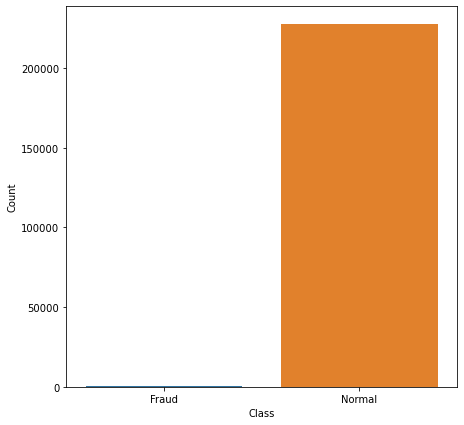

In [17]:
plt.figure(figsize=(7, 7))
fraud_count=training_data[training_data['Class']==1]['Class'].count()
normal_count=training_data[training_data['Class']==0]['Class'].count()
print(fraud_count,normal_count)
sns.barplot(y=[fraud_count,normal_count],x=['Fraud','Normal'])
plt.xlabel('Class')
plt.ylabel('Count')
# Show the plot
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [19]:
X=data.drop(['Amount'],axis=1)
Y=data['Class']

In [20]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
classifier = MLPClassifier(random_state=42, max_iter=10,hidden_layer_sizes=(10,2), solver='adam', shuffle=True).fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
df1=pd.DataFrame({'Predicted Class': y_pred,'Actual Class': Y_test })
print("Accuracy is =", classifier.score(X_test, Y_test))
df1

Accuracy is = 0.9998771110564938


C:\Users\dines\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [21]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
classifier = MLPClassifier(random_state=42, max_iter=20,hidden_layer_sizes=(10,2), solver='adam', shuffle=True).fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
df1=pd.DataFrame({'Predicted Class': y_pred,'Actual Class': Y_test })
print("Accuracy is =", classifier.score(X_test, Y_test))
df1

Accuracy is = 1.0


C:\Users\dines\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


# Logistic Regression

In [22]:
model=LogisticRegression(max_iter=50,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
d=pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  
X_test,Y_test
d

Accuracy score of testing  model =  1.0


,Original Class,Predicted Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [23]:
model=LogisticRegression(max_iter=40,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.9%  

Accuracy score of testing  model =  1.0


In [24]:
model=LogisticRegression(max_iter=20,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  

Accuracy score of testing  model =  1.0


In [25]:
model=LogisticRegression(max_iter=100,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  

Accuracy score of testing  model =  1.0


Confusion Matrix is  [[56864     0]
 [    0    98]]
The precision on training data is : 1.0
The recall on training data is : 1.0


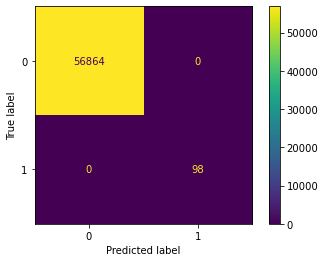

In [26]:
cm_matrix_test = confusion_matrix(Y_test,b)
print("Confusion Matrix is ", cm_matrix_test)
cm_display = ConfusionMatrixDisplay(cm_matrix_test).plot()
precision = precision_score(Y_test,b)
print(f"The precision on training data is : {round(precision, 3)}")
recall = recall_score(Y_test, b)
print(f"The recall on training data is : {round(recall, 2)}")